In [33]:
#import necessary pacakages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn import *

In [8]:
# Read all the given datasets

air_reserve=pd.read_csv("recruit-restaurant-visitor-forecasting/air_reserve.csv/air_reserve.csv")
air_store_info=pd.read_csv("recruit-restaurant-visitor-forecasting/air_store_info.csv/air_store_info.csv")
air_visit_data=pd.read_csv("recruit-restaurant-visitor-forecasting/air_visit_data.csv/air_visit_data.csv")
date_info=pd.read_csv("recruit-restaurant-visitor-forecasting/date_info.csv/date_info.csv")
hpg_reserve=pd.read_csv("recruit-restaurant-visitor-forecasting/hpg_reserve.csv/hpg_reserve.csv")
hpg_store_info=pd.read_csv("recruit-restaurant-visitor-forecasting/hpg_store_info.csv/hpg_store_info.csv")
store_id_relation=pd.read_csv("recruit-restaurant-visitor-forecasting/store_id_relation.csv/store_id_relation.csv")
sample_submission=pd.read_csv("recruit-restaurant-visitor-forecasting/sample_submission.csv/sample_Submission.csv")
date_info=pd.read_csv("recruit-restaurant-visitor-forecasting/date_info.csv/date_info.csv")

In [9]:
air_reserve.head()

,air_store_id,visit_datetime,reserve_datetime,reserve_visitors
0,air_877f79706adbfb06,2016-01-01 19:00:00,2016-01-01 16:00:00,1
1,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,3
2,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,6
3,air_877f79706adbfb06,2016-01-01 20:00:00,2016-01-01 16:00:00,2
4,air_db80363d35f10926,2016-01-01 20:00:00,2016-01-01 01:00:00,5


In [46]:
hpg_reserve.head()

,air_store_id,visit_date,rs1,rv1,rs2,rv2
0,air_00a91d42b08b08d9,2016-01-14,3,2,3.0,2.0
1,air_00a91d42b08b08d9,2016-01-15,6,4,6.0,4.0
2,air_00a91d42b08b08d9,2016-01-16,3,2,3.0,2.0
3,air_00a91d42b08b08d9,2016-01-22,3,2,3.0,2.0
4,air_00a91d42b08b08d9,2016-01-29,6,5,6.0,5.0


In [12]:
# Merge the hpg_reserve and store_id_relation to get the restaurants which used both hpg_reserve and air_reserve

hpg_reserve = pd.merge(hpg_reserve, store_id_relation, how='inner', on=['hpg_store_id'])


In [13]:
# Change the reserve datasets with proper datetime and date time differences
def change_reserve(df): 
    df['visit_datetime'] = pd.to_datetime(df['visit_datetime'])
    df['visit_datetime'] = df['visit_datetime'].dt.date
    df['reserve_datetime'] = pd.to_datetime(df['reserve_datetime'])
    df['reserve_datetime'] = df['reserve_datetime'].dt.date
    df['reserve_datetime_diff'] = df.apply(lambda r: (r['visit_datetime'] - r['reserve_datetime']).days, axis=1)
    # To get the sum of the visitors visited at that particular date and restaurant
    
    tmp1 = df.groupby(['air_store_id','visit_datetime'], as_index=False)[['reserve_datetime_diff', 'reserve_visitors']].sum().\
                    rename(columns={'visit_datetime':'visit_date', 'reserve_datetime_diff': 'rs1', 'reserve_visitors':'rv1'})
    
    # To get the mean of the visitors visited at that particular date and restaurant
    
    tmp2 = df.groupby(['air_store_id','visit_datetime'], as_index=False)[['reserve_datetime_diff', 'reserve_visitors']].mean().\
                    rename(columns={'visit_datetime':'visit_date', 'reserve_datetime_diff': 'rs2', 'reserve_visitors':'rv2'})
    
    # Merge the below data to a dataframe
    
    df = pd.merge(tmp1, tmp2, how='inner', on=['air_store_id','visit_date'])
    return df

In [14]:
# Change the air_reserve and hpg_reserve using the change_reserve function
air_reserve=change_reserve(air_reserve)
hpg_reserve=change_reserve(hpg_reserve)

In [16]:
air_reserve.head()

,air_store_id,visit_date,rs1,rv1,rs2,rv2
0,air_00a91d42b08b08d9,2016-10-31,0,2,0.0,2.0
1,air_00a91d42b08b08d9,2016-12-05,4,9,4.0,9.0
2,air_00a91d42b08b08d9,2016-12-14,6,18,6.0,18.0
3,air_00a91d42b08b08d9,2016-12-17,6,2,6.0,2.0
4,air_00a91d42b08b08d9,2016-12-20,2,4,2.0,4.0


In [17]:
hpg_reserve.head()

,air_store_id,visit_date,rs1,rv1,rs2,rv2
0,air_00a91d42b08b08d9,2016-01-14,3,2,3.0,2.0
1,air_00a91d42b08b08d9,2016-01-15,6,4,6.0,4.0
2,air_00a91d42b08b08d9,2016-01-16,3,2,3.0,2.0
3,air_00a91d42b08b08d9,2016-01-22,3,2,3.0,2.0
4,air_00a91d42b08b08d9,2016-01-29,6,5,6.0,5.0


In [18]:
# Changing air visit data with proper datetime and add day of week

air_visit_data['visit_date'] = pd.to_datetime(air_visit_data['visit_date'])
air_visit_data['DOweek'] = air_visit_data['visit_date'].dt.dayofweek
air_visit_data['year'] = air_visit_data['visit_date'].dt.year
air_visit_data['month'] = air_visit_data['visit_date'].dt.month
air_visit_data['visit_date'] = air_visit_data['visit_date'].dt.date
air_visit_data

,air_store_id,visit_date,visitors,DOweek,year,month
0,air_ba937bf13d40fb24,2016-01-13,25,2,2016,1
1,air_ba937bf13d40fb24,2016-01-14,32,3,2016,1
2,air_ba937bf13d40fb24,2016-01-15,29,4,2016,1
3,air_ba937bf13d40fb24,2016-01-16,22,5,2016,1
4,air_ba937bf13d40fb24,2016-01-18,6,0,2016,1
...,...,...,...,...,...,...
252103,air_24e8414b9b07decb,2017-04-18,6,1,2017,4
252104,air_24e8414b9b07decb,2017-04-19,6,2,2017,4
252105,air_24e8414b9b07decb,2017-04-20,7,3,2017,4
252106,air_24e8414b9b07decb,2017-04-21,8,4,2017,4


In [19]:
# Convert sample_Sumbmission data with visit_Date and Air_Store_id

sample_submission['visit_date'] = sample_submission['id'].map(lambda x: str(x).split('_')[2])
sample_submission['air_store_id'] = sample_submission['id'].map(lambda x: '_'.join(x.split('_')[:2]))

# Split the visit_date column into more columns such as date, week, month and date 

sample_submission['visit_date'] = pd.to_datetime(sample_submission['visit_date'])
sample_submission['DOweek'] = sample_submission['visit_date'].dt.dayofweek
sample_submission['year'] = sample_submission['visit_date'].dt.year
sample_submission['month'] = sample_submission['visit_date'].dt.month
sample_submission['visit_date'] = sample_submission['visit_date'].dt.date
sample_submission=sample_submission.drop(columns=['id'])

# Get the unique stores from the sample_Submission

unique_stores_info = sample_submission['air_store_id'].unique()

# Split the unique_stores date to day of week wise data to combine it with air_visit_data

air_store_id_dow = pd.concat([pd.DataFrame({'air_store_id': unique_stores_info, 'DOweek': [j]*(unique_stores_info.shape[0])})\
                              for j in range(7)], axis=0, ignore_index=True).reset_index(drop=True)

In [47]:
air_store_id_dow.head()

,air_store_id,DOweek,min_visitors,mean_visitors,median_visitors,max_visitors,count_observations,air_genre_name,air_area_name,latitude,longitude,visitors_per_area,restaurants_per_area
0,air_00a91d42b08b08d9,0,1.0,22.457143,19.0,47.0,35.0,6,44,35.694003,139.753595,1105.0,28
1,air_0164b9927d20bcc3,0,2.0,7.500000,6.0,19.0,20.0,6,62,35.658068,139.751599,4473.0,91
2,air_0241aa3964b7f861,0,2.0,8.920635,8.0,23.0,63.0,7,82,35.712607,139.779996,869.0,21
3,air_0328696196e46f18,0,2.0,6.416667,4.0,27.0,12.0,4,98,34.701279,135.528090,471.0,14
4,air_034a3d5b40d5b1b1,0,1.0,11.864865,10.0,66.0,37.0,2,102,34.692337,135.472229,490.0,14


In [21]:
sample_submission.head()

,visitors,visit_date,air_store_id,DOweek,year,month
0,0,2017-04-23,air_00a91d42b08b08d9,6,2017,4
1,0,2017-04-24,air_00a91d42b08b08d9,0,2017,4
2,0,2017-04-25,air_00a91d42b08b08d9,1,2017,4
3,0,2017-04-26,air_00a91d42b08b08d9,2,2017,4
4,0,2017-04-27,air_00a91d42b08b08d9,3,2017,4
...,...,...,...,...,...,...
32014,0,2017-05-27,air_fff68b929994bfbd,5,2017,5
32015,0,2017-05-28,air_fff68b929994bfbd,6,2017,5
32016,0,2017-05-29,air_fff68b929994bfbd,0,2017,5
32017,0,2017-05-30,air_fff68b929994bfbd,1,2017,5


In [23]:
# To get the min,max,mean and the count of visitors from the air_visit_data in the given day of the week

air_visitors_info = air_visit_data.groupby(['air_store_id','DOweek'])\
                    .agg({'visitors' : [np.min,np.mean,np.median,np.max,np.size]}).reset_index()
air_visitors_info.columns = ['air_store_id', 'DOweek', 'min_visitors', 'mean_visitors',\
                            'median_visitors','max_visitors','count_observations']



In [24]:
air_visitors_info.head()

,air_store_id,DOweek,min_visitors,mean_visitors,median_visitors,max_visitors,count_observations
0,air_00a91d42b08b08d9,0,1,22.457143,19.0,47,35
1,air_00a91d42b08b08d9,1,1,24.350000,24.5,43,40
2,air_00a91d42b08b08d9,2,15,28.125000,28.0,52,40
3,air_00a91d42b08b08d9,3,15,29.868421,30.0,47,38
4,air_00a91d42b08b08d9,4,17,36.500000,35.5,57,40
...,...,...,...,...,...,...,...
5736,air_fff68b929994bfbd,2,1,4.634146,4.0,12,41
5737,air_fff68b929994bfbd,3,1,4.707317,4.0,12,41
5738,air_fff68b929994bfbd,4,1,5.627907,5.0,17,43
5739,air_fff68b929994bfbd,5,2,7.439024,7.0,18,41


In [26]:
# Merge the air_store_info with the air_visitors_Data and air_Store_info data.

air_store_id_dow = pd.merge(air_store_id_dow, air_visitors_info, how='left', on=['air_store_id','DOweek']) 
air_store_id_dow = pd.merge(air_store_id_dow, air_store_info, how='left', on=['air_store_id']) 

In [27]:
# To get the total number of restaurants per area.

rest_per_area=air_store_id_dow.groupby(['air_area_name','air_genre_name'], as_index=False)[['air_store_id']]\
                                        .count().rename(columns={'air_store_id':'restaurants_per_area'})

# To get the number of visitors visiting per area.

air_per_area=air_store_id_dow.groupby(['air_area_name','air_genre_name'], as_index=False)[['max_visitors']]\
                                        .sum().rename(columns={'max_visitors':'visitors_per_area'})

In [28]:
# Merge the rest_per_area and air_per_area data with air_store_id_dow.

air_store_id_dow = pd.merge(air_store_id_dow, air_per_area, how='left', on=['air_area_name','air_genre_name'])
air_store_id_dow = pd.merge(air_store_id_dow, rest_per_area, how='left', on=['air_area_name','air_genre_name'])

In [29]:
# To get the genre and area name clearly from the data.

air_store_id_dow ['air_genre_name'] = air_store_id_dow ['air_genre_name'].map(lambda x: str(str(x).replace('/',' ')))
air_store_id_dow ['air_area_name'] = air_store_id_dow ['air_area_name'].map(lambda x: str(str(x).replace('-',' ')))

In [34]:
# To labelize the data.

lbl = preprocessing.LabelEncoder()
air_store_id_dow ['air_genre_name'] = lbl.fit_transform(air_store_id_dow ['air_genre_name'])
air_store_id_dow ['air_area_name'] = lbl.fit_transform(air_store_id_dow ['air_area_name'])


In [48]:
air_store_id_dow.head()

,air_store_id,DOweek,min_visitors,mean_visitors,median_visitors,max_visitors,count_observations,air_genre_name,air_area_name,latitude,longitude,visitors_per_area,restaurants_per_area
0,air_00a91d42b08b08d9,0,1.0,22.457143,19.0,47.0,35.0,6,44,35.694003,139.753595,1105.0,28
1,air_0164b9927d20bcc3,0,2.0,7.500000,6.0,19.0,20.0,6,62,35.658068,139.751599,4473.0,91
2,air_0241aa3964b7f861,0,2.0,8.920635,8.0,23.0,63.0,7,82,35.712607,139.779996,869.0,21
3,air_0328696196e46f18,0,2.0,6.416667,4.0,27.0,12.0,4,98,34.701279,135.528090,471.0,14
4,air_034a3d5b40d5b1b1,0,1.0,11.864865,10.0,66.0,37.0,2,102,34.692337,135.472229,490.0,14


In [35]:
# Convert date_info to proper date time.

date_info['calendar_date'] = pd.to_datetime(date_info['calendar_date'])
date_info['day_of_week'] = lbl.fit_transform(date_info['day_of_week'])
date_info['calendar_date'] = date_info['calendar_date'].dt.date

# Rename the calendar date to visit date.

date_info=date_info.rename(columns={'calendar_date':'visit_date'})

In [37]:
# Merge the air_visit data and date_info data to train data.

train = pd.merge(air_visit_data, date_info, how='left', on=['visit_date']) 

# Merge the sample_Submission data and date_info data to test data.

test = pd.merge(sample_submission, date_info, how='left', on=['visit_date']) 

# Merge the air_store_id_dow with the train and test data.

train = pd.merge(train, air_store_id_dow, how='left', on=['air_store_id','DOweek']) 
test = pd.merge(test, air_store_id_dow, how='left', on=['air_store_id','DOweek'])

for data in [air_reserve,hpg_reserve]:
    train = pd.merge(train, data, how='left', on=['air_store_id','visit_date']) 
    test = pd.merge(test, data, how='left', on=['air_store_id','visit_date'])

In [38]:
# Total sum and mean of reserve visitors for both hpg and air reserve data.

train['total_reserv_sum'] = train['rv1_x'] + train['rv1_y']
train['total_reserv_mean'] = (train['rv2_x'] + train['rv2_y']) / 2
train['total_reserv_dt_diff_mean'] = (train['rs2_x'] + train['rs2_y']) / 2
test['total_reserv_sum'] = test['rv1_x'] + test['rv1_y']
test['total_reserv_mean'] = (test['rv2_x'] + test['rv2_y']) / 2
test['total_reserv_dt_diff_mean'] = (test['rs2_x'] + test['rs2_y']) / 2

In [39]:
# Converting the visit_date into string format using strftime.

train['date_int'] = train['visit_date'].apply(lambda x: x.strftime('%Y%m%d')).astype(int)
test['date_int'] = test['visit_date'].apply(lambda x: x.strftime('%Y%m%d')).astype(int)


In [40]:

train['air_store_id2'] = lbl.fit_transform(train['air_store_id'])
test['air_store_id2'] = lbl.transform(test['air_store_id'])

In [41]:
train.columns

Index(['air_store_id', 'visit_date', 'visitors', 'DOweek', 'year', 'month',
       'day_of_week', 'holiday_flg', 'min_visitors', 'mean_visitors',
       'median_visitors', 'max_visitors', 'count_observations',
       'air_genre_name', 'air_area_name', 'latitude', 'longitude',
       'visitors_per_area', 'restaurants_per_area', 'rs1_x', 'rv1_x', 'rs2_x',
       'rv2_x', 'rs1_y', 'rv1_y', 'rs2_y', 'rv2_y', 'total_reserv_sum',
       'total_reserv_mean', 'total_reserv_dt_diff_mean', 'date_int',
       'air_store_id2'],
      dtype='object')

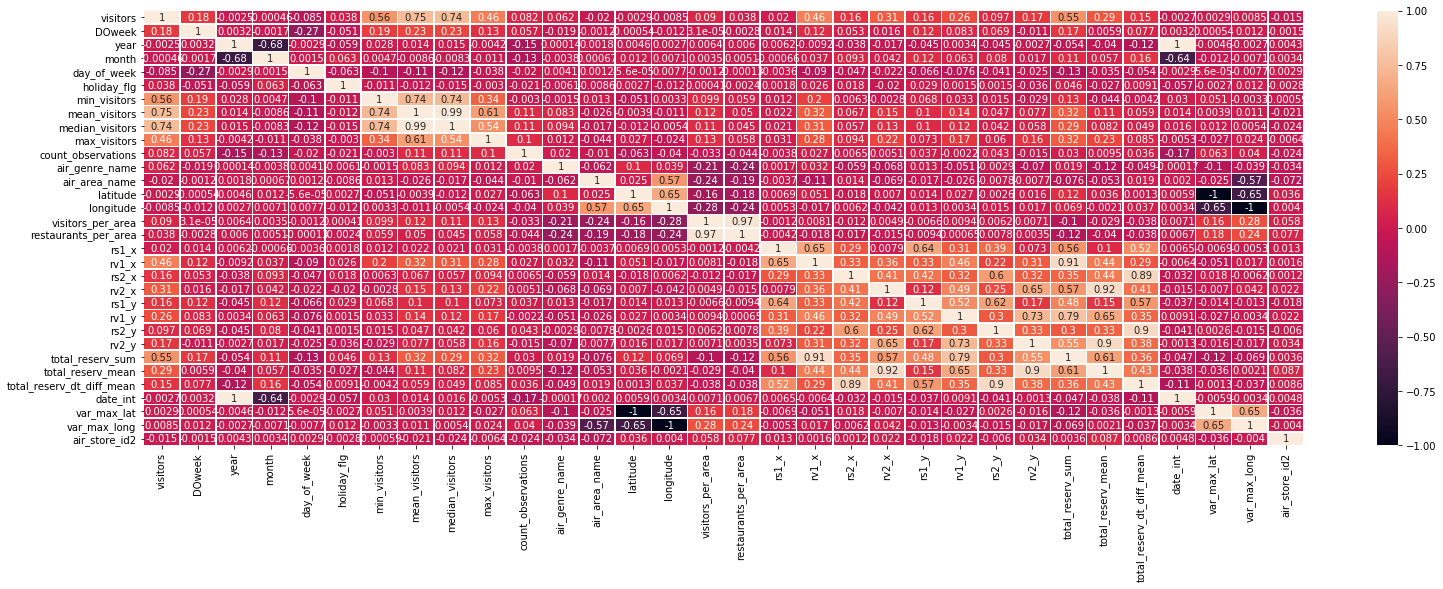

In [330]:

fig, ax = plt.subplots(figsize=(26,8))  
sns.heatmap(train.corr(), linewidths=.6,ax=ax,annot=True)

In [332]:
# Fill the null values with -1.

train = train.fillna(-1)
test = test.fillna(-1)

In [333]:
# Removing the features with almost high same correaltion since they have same effect on target variable.

train=train.drop(["median_visitors","min_visitors"],axis=1)

In [334]:
X=train
y= (train['visitors'])

In [335]:
# Removing the features which have no coorelation.

columns = [cols for cols in X if cols not in ['visit_date','latitude','longitude','day_of_week','air_store_id','visitors']]
X1=X[columns]

In [336]:
X1

,DOweek,year,month,holiday_flg,mean_visitors,max_visitors,count_observations,air_genre_name,air_area_name,visitors_per_area,...,rv2_x,rs1_y,rv1_y,rs2_y,rv2_y,total_reserv_sum,total_reserv_mean,total_reserv_dt_diff_mean,date_int,air_store_id2
0,2,2016,1,0,23.843750,57.0,64.0,4.0,62.0,2488.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,20160113,603
1,3,2016,1,0,20.292308,54.0,65.0,4.0,62.0,2488.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,20160114,603
2,4,2016,1,0,34.738462,61.0,65.0,4.0,62.0,2488.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,20160115,603
3,5,2016,1,0,27.651515,53.0,66.0,4.0,62.0,2488.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,20160116,603
4,0,2016,1,0,13.754386,34.0,57.0,4.0,62.0,2488.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,20160118,603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252103,1,2017,4,0,5.615385,11.0,39.0,11.0,72.0,269.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,20170418,98
252104,2,2017,4,0,6.575000,25.0,40.0,11.0,72.0,269.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,20170419,98
252105,3,2017,4,0,5.394737,8.0,38.0,11.0,72.0,269.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,20170420,98
252106,4,2017,4,0,5.738095,9.0,42.0,11.0,72.0,269.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,20170421,98


In [338]:
# Get the important features using decision tree regressor.

from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(X1, y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

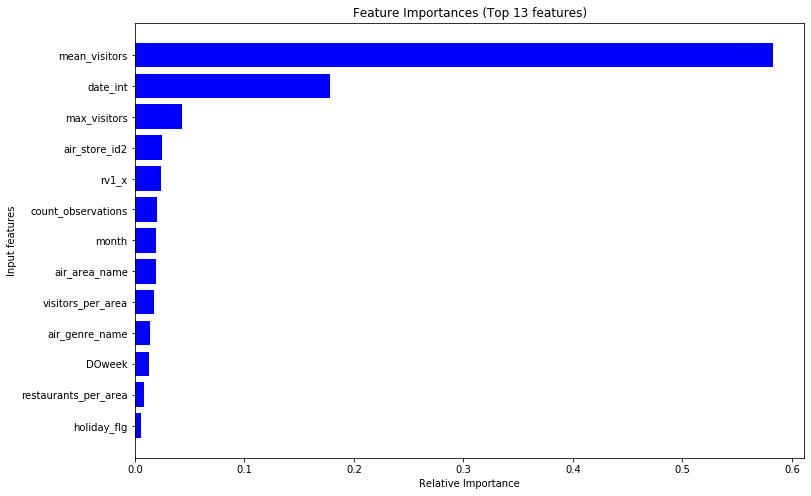

<Figure size 432x288 with 0 Axes>

In [357]:
# Plot to show top 13 features 

features = X1.columns
importances = model.feature_importances_
indices = (np.argsort(importances))[-13:]
plt.figure(figsize=(12,8))
plt.title('Feature Importances (Top 13 features)')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.ylabel("Input features")
plt.xlabel('Relative Importance')
plt.show()
plt.savefig('features.png', bbox_inches='tight')

In [342]:
# Split the data into train and validation datasets by date.

train_index = X.loc[X.visit_date <= pd.to_datetime('2017-03-30',format= '%Y-%m-%d')].index
val_index = X.loc[X.visit_date > pd.to_datetime('2017-03-30',format= '%Y-%m-%d')].index
val_train = X.iloc[train_index]
val_train_y = y[train_index]
val_test = X.iloc[val_index]
val_test_y = y[val_index]


In [351]:
# Considering only the top 13 features which are found to be crucial in predicting the output.

top_features=[features[i] for i in indices]
top_features.reverse()
columns = [cols for cols in X if cols in top_features]
val_train=val_train[columns]
val_test=val_test[columns]
X_test=test[columns]
y_test=test['visitors']

In [352]:
# Save all the datasets in .csv file for applying regression techniques to it.

X_test.to_csv("X_test.csv",index=False)
y_test.to_csv("y_test.csv",index=False)
val_train.to_csv("X_train.csv",index=False)
val_train_y.to_csv("y_train.csv",index=False)
val_test.to_csv("X_val.csv",index=False)
val_test_y.to_csv("y_val.csv",index=False)